In [1]:
import os
import gc
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import spatialdm as sd

## Visual Analysis

### Data preprocessing

In [6]:
path_chuvio_L1_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_1_RCTD_lvl3.h5ad"
chuvio_L1_1 = sc.read_h5ad(path_chuvio_L1_1)

chuvio_L1_1.obsm['spatial'] = chuvio_L1_1.obs[['x_centroid', 'y_centroid']].to_numpy()

In [7]:
path_chuvio_L1_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_2_RCTD_lvl3.h5ad"
chuvio_L1_2 = sc.read_h5ad(path_chuvio_L1_1)

chuvio_L1_2.obsm['spatial'] = chuvio_L1_2.obs[['x_centroid', 'y_centroid']].to_numpy()

path_chuvio_L1_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L2_1_RCTD_lvl3.h5ad"
chuvio_L2_1 = sc.read_h5ad(path_chuvio_L1_1)

chuvio_L2_1.obsm['spatial'] = chuvio_L2_1.obs[['x_centroid', 'y_centroid']].to_numpy()

### Visual analysis

In [61]:
melanoma = sdm.datasets.dataset.melanoma()

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [62]:
melanoma.raw.to_adata()

AnnData object with n_obs × n_vars = 293 × 16148
    obs: 'B', 'CAF', 'Endo', 'Macro', 'Melanoma or unclassified', 'NK', 'T'
    obsm: 'spatial'

In [8]:
chuvio_L1_1.raw = chuvio_L1_1
chuvio_L1_2.raw = chuvio_L1_2
chuvio_L2_1.raw = chuvio_L2_1

In [ ]:
sdm.weight_matrix

In [11]:
import spatialdm as sdm
adata = chuvio_L1_1



sdm.weight_matrix(adata, l=120, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel
sdm.extract_lr(adata, 'human', min_cell=1)      # find overlapping LRs from CellChatDB
sdm.spatialdm_global(adata, 100, specified_ind=None, method='both', nproc=1)     # global Moran selection (orig 1000 set to 100)
sdm.sig_pairs(adata, method='permutation', fdr=True, threshold=0.1)     # select significant pairs
sdm.spatialdm_local(adata, n_perm=100, method='both', specified_ind=None, nproc=1)     # local spot selection
sdm.sig_spots(adata, method='permutation', fdr=False, threshold=0.1)     # significant local spots

chuvio_L1_1_sDM = adata

100%|██████████| 100/100 [00:28<00:00,  3.47it/s]


In [12]:
adata = chuvio_L1_2



sdm.weight_matrix(adata, l=120, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel
sdm.extract_lr(adata, 'human', min_cell=1)      # find overlapping LRs from CellChatDB
sdm.spatialdm_global(adata, 100, specified_ind=None, method='both', nproc=1)     # global Moran selection (orig 1000 set to 100)
sdm.sig_pairs(adata, method='permutation', fdr=True, threshold=0.1)     # select significant pairs
sdm.spatialdm_local(adata, n_perm=100, method='both', specified_ind=None, nproc=1)     # local spot selection
sdm.sig_spots(adata, method='permutation', fdr=False, threshold=0.1)     # significant local spots

chuvio_L1_2_sDM = adata

#chuvio_L1_2_sDM.write_h5ad('chuvio_L1_2_sDM.h5ad')

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


In [23]:
adata = chuvio_L2_1



sdm.weight_matrix(adata, l=120, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel
sdm.extract_lr(adata, 'human', min_cell=1)      # find overlapping LRs from CellChatDB
sdm.spatialdm_global(adata, 100, specified_ind=None, method='both', nproc=1)     # global Moran selection (orig 1000 set to 100)
sdm.sig_pairs(adata, method='permutation', fdr=True, threshold=0.1)     # select significant pairs
sdm.spatialdm_local(adata, n_perm=100, method='both', specified_ind=None, nproc=1)     # local spot selection
sdm.sig_spots(adata, method='permutation', fdr=False, threshold=0.1)     # significant local spots

chuvio_L2_1_sDM = adata

#chuvio_L2_1_sDM.write_h5ad('chuvio_L2_1_sDM.h5ad')

100%|██████████| 100/100 [00:13<00:00,  7.33it/s]


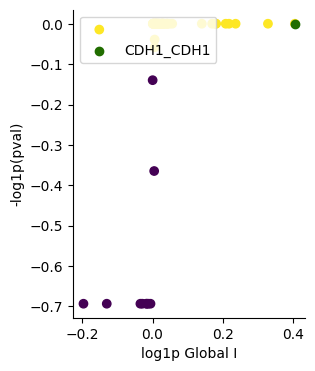

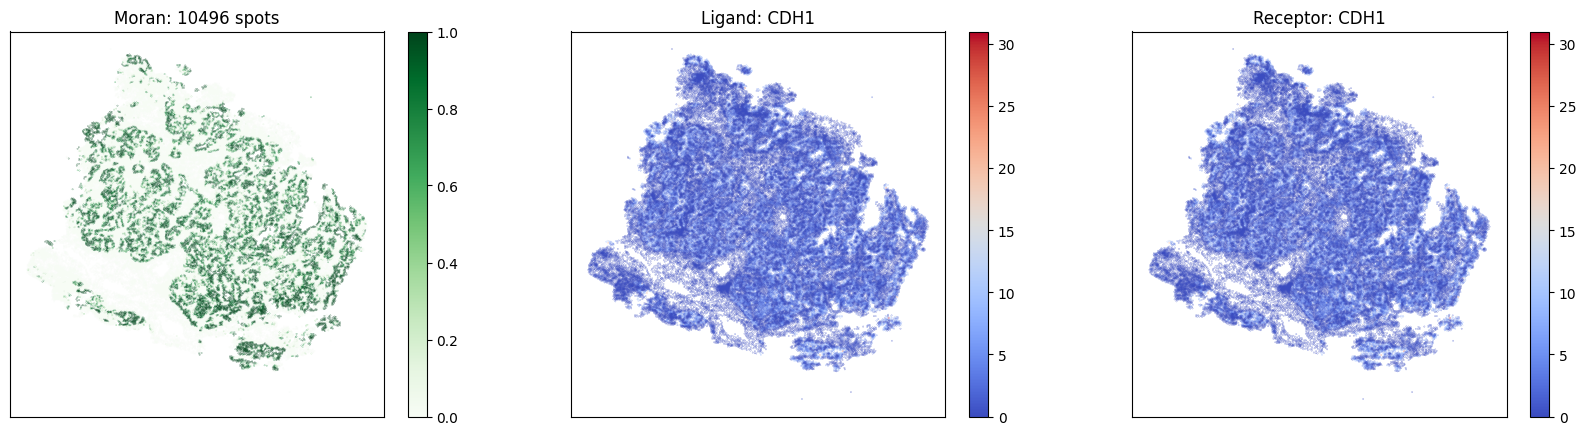

In [73]:
# visualize global and local pairs
import spatialdm.plottings as pl
pl.global_plot(adata, pairs=['CDH1_CDH1'])
pl.plot_pairs(adata, ['CDH1_CDH1'], marker='.', s=0.1)

## Top genes for later analysis

follow SpatialDM/tutorial/melanoma

In [75]:
print(adata.uns['global_res'].selected.sum())
adata.uns['global_res'].sort_values(by='fdr').head()

61


,Ligand0,Receptor0,Receptor1,z_pval,z,perm_pval,fdr,selected
CCL22_CCR4,CCL22,CCR4,None,0.000000e+00,137.421931,0.0,0.0,True
HGF_MET,HGF,MET,None,1.473915e-03,2.973126,0.0,0.0,True
GAS6_AXL,GAS6,AXL,None,0.000000e+00,118.421993,0.0,0.0,True
FASL_FAS,FASLG,FAS,None,3.206458e-29,11.159809,0.0,0.0,True
CCL3_CCR1,CCL3,CCR1,None,1.345567e-301,37.101159,0.0,0.0,True


## Normalization check

In [54]:
#We want to check which of the layers it is using ... we want to use .layers["log1p_norm"]

In [55]:
chuvio_L1_1.layers

Layers with keys: logcounts

## Checking the runs on all tissues

In [19]:
print(chuvio_L1_1_sDM.uns['global_res'].selected.sum())
chuvio_L1_1_sDM.uns['global_res'].sort_values(by='fdr').head()

60


,Ligand0,Receptor0,Receptor1,z_pval,z,perm_pval,fdr,selected
CCL22_CCR4,CCL22,CCR4,None,0.000000e+00,137.421931,0.0,0.0,True
GAS6_AXL,GAS6,AXL,None,0.000000e+00,118.421993,0.0,0.0,True
FASL_FAS,FASLG,FAS,None,3.206458e-29,11.159809,0.0,0.0,True
CCL5_CCR1,CCL5,CCR1,None,0.000000e+00,61.678794,0.0,0.0,True
CCL5_CCR4,CCL5,CCR4,None,0.000000e+00,161.812060,0.0,0.0,True


In [20]:
print(chuvio_L1_2_sDM.uns['global_res'].selected.sum())
chuvio_L1_2_sDM.uns['global_res'].sort_values(by='fdr').head()

58


,Ligand0,Receptor0,Receptor1,z_pval,z,perm_pval,fdr,selected
CCL22_CCR4,CCL22,CCR4,None,0.000000e+00,104.431054,0.0,0.0,True
CXCL10_CXCR3,CXCL10,CXCR3,None,6.375822e-93,20.413250,0.0,0.0,True
GAS6_AXL,GAS6,AXL,None,0.000000e+00,83.421565,0.0,0.0,True
FASL_FAS,FASLG,FAS,None,3.965333e-20,9.114127,0.0,0.0,True
CCL19_CCR7,CCL19,CCR7,None,0.000000e+00,188.319361,0.0,0.0,True


In [24]:
print(chuvio_L2_1_sDM.uns['global_res'].selected.sum())
chuvio_L1_1_sDM.uns['global_res'].sort_values(by='fdr').head()

53


,Ligand0,Receptor0,Receptor1,z_pval,z,perm_pval,fdr,selected
CCL22_CCR4,CCL22,CCR4,None,2.979277e-11,6.544774,0.0,0.0,True
HLA-DQA2_CD4,HLA-DQA2,CD4,None,1.014545e-98,21.055667,0.0,0.0,True
HLA-DRB5_CD4,HLA-DRB5,CD4,None,0.000000e+00,87.463006,0.0,0.0,True
NCAM1_NCAM1,NCAM1,NCAM1,None,0.000000e+00,95.843027,0.0,0.0,True
COL1A1_CD44,COL1A1,CD44,None,0.000000e+00,48.621445,0.0,0.0,True


In [ ]:
print(chuvio_L3_1_sDM.uns['global_res'].selected.sum())
chuvio_L3_1_sDM.uns['global_res'].sort_values(by='fdr').head()

In [ ]:
print(chuvio_L4_1_sDM.uns['global_res'].selected.sum())
chuvio_L4_1_sDM.uns['global_res'].sort_values(by='fdr').head()

In [13]:
#savng the top genes outputs
chuvio_L1_1_sDM_top_G = chuvio_L1_1_sDM.uns['global_res'].sort_values(by='fdr')
chuvio_L1_2_sDM_top_G = chuvio_L1_2_sDM.uns['global_res'].sort_values(by='fdr')
#chuvio_L2_1_sDM_top_G = chuvio_L2_1_sDM.uns['global_res'].sort_values(by='fdr')


chuvio_L1_1_sDM_top_G.to_csv('chuvio_L1_1_sDM_top_G.csv', index=False)
chuvio_L1_2_sDM_top_G.to_csv('chuvio_L1_2_sDM_top_G.csv', index=False)
#chuvio_L2_1_sDM_top_G.to_csv('chuvio_L2_1_sDM_top_G.csv', index=False)q

In [27]:
chuvio_L2_1_sDM_top_G.to_csv('chuvio_L2_1_sDM_top_G.csv', index=False)

In [14]:
chuvio_L1_2_sDM_top_G

,Ligand0,Receptor0,Receptor1,z_pval,z,perm_pval,fdr,selected
CCL22_CCR4,CCL22,CCR4,None,0.000000e+00,104.431054,0.0,0.0,True
GAS6_AXL,GAS6,AXL,None,0.000000e+00,83.421565,0.0,0.0,True
FASL_FAS,FASLG,FAS,None,3.965333e-20,9.114127,0.0,0.0,True
CCL19_CCR7,CCL19,CCR7,None,0.000000e+00,188.319361,0.0,0.0,True
CCL5_CCR4,CCL5,CCR4,None,0.000000e+00,91.546033,0.0,0.0,True
...,...,...,...,...,...,...,...,...
FN1_CD44,FN1,CD44,None,1.000000e+00,-96.677322,1.0,1.0,False
COL1A1_CD44,COL1A1,CD44,None,1.000000e+00,-68.942532,1.0,1.0,False
CDH1_KLRG1,CDH1,KLRG1,None,1.000000e+00,-23.148059,1.0,1.0,False
CXCL16_CXCR6,CXCL16,CXCR6,None,1.000000e+00,-107.276328,1.0,1.0,False


In [16]:
selected_rows = chuvio_L1_2_sDM_top_G[chuvio_L1_2_sDM_top_G['selected'] == True]

# Print the selected rows
print(selected_rows)

                        Ligand0  Receptor0 Receptor1         z_pval  \
CCL22_CCR4                CCL22       CCR4      None   0.000000e+00   
GAS6_AXL                   GAS6        AXL      None   0.000000e+00   
FASL_FAS                  FASLG        FAS      None   3.965333e-20   
CCL19_CCR7                CCL19       CCR7      None   0.000000e+00   
CCL5_CCR4                  CCL5       CCR4      None   0.000000e+00   
TNFSF13_TNFRSF13B       TNFSF13  TNFRSF13B      None  3.588458e-147   
CCL5_CCR1                  CCL5       CCR1      None   0.000000e+00   
CSF1_CSF1R                 CSF1      CSF1R      None  6.799102e-243   
CCL3_CCR1                  CCL3       CCR1      None  5.081134e-242   
IL15_IL15RA_IL2RB          IL15     IL15RA     IL2RG   1.753170e-25   
IL7_IL7R_IL2RG              IL7       IL7R     IL2RG   1.589264e-18   
CCL2_CCR2                  CCL2       CCR2      None   0.000000e+00   
VEGFA_VEGFR1R2            VEGFA        KDR      None   0.000000e+00   
CXCL10

### Looking if all genes are in the CellPhoneDB complex data file 

In [4]:
#read in the dataset
CellChatDB = pd.read_csv("complex_input_CellChatDB.csv")

#read in the list of genes from L1_1 
g_L1_1 = pd.read_csv("chuvio_L1_1_sDM_top_G.csv")

#check if for all genes in list 

In [5]:
g_L1_1

,Ligand0,Receptor0,Receptor1,z_pval,z,perm_pval,fdr,selected
0,CCL22,CCR4,NaN,0.000000e+00,137.421931,0.0,0.0,True
1,GAS6,AXL,NaN,0.000000e+00,118.421993,0.0,0.0,True
2,FASLG,FAS,NaN,3.206458e-29,11.159809,0.0,0.0,True
3,CCL5,CCR1,NaN,0.000000e+00,61.678794,0.0,0.0,True
4,CCL5,CCR4,NaN,0.000000e+00,161.812060,0.0,0.0,True
...,...,...,...,...,...,...,...,...
66,FN1,CD44,NaN,1.000000e+00,-125.050076,1.0,1.0,False
67,COL1A1,CD44,NaN,1.000000e+00,-85.620604,1.0,1.0,False
68,CDH1,KLRG1,NaN,1.000000e+00,-20.055904,1.0,1.0,False
69,CXCL16,CXCR6,NaN,1.000000e+00,-127.599089,1.0,1.0,False


In [14]:
len(unique_values_g_L1_1)

47

In [15]:
values_not_in_subunit_1

0     True
1     True
2     True
3     True
4     True
      ... 
66    True
67    True
68    True
69    True
70    True
Name: Ligand0, Length: 71, dtype: bool

In [13]:
# Assuming g_L1_1 and CellChatDB are pandas DataFrames

values_not_in_subunit_1 = ~g_L1_1["Ligand0"].isin(CellChatDB["subunit_1"])

# Count the number of such values
num_values_not_in_subunit_1 = values_not_in_subunit_1.sum()

print("Number of values in g_L1_1['Ligand0'] not in CellChatDB['subunit_1']:", num_values_not_in_subunit_1)


Number of values in g_L1_1['Ligand0'] not in CellChatDB['subunit_1']: 71


In [6]:
CellChatDB

,Unnamed: 0,subunit_1,subunit_2,subunit_3,subunit_4
0,Activin AB,INHBA,INHBB,NaN,NaN
1,Inhibin A,INHA,INHBA,NaN,NaN
2,Inhibin B,INHA,INHBB,NaN,NaN
3,IL12AB,IL12A,IL12B,NaN,NaN
4,IL23 complex,IL12B,IL23A,NaN,NaN
...,...,...,...,...,...
152,TGFBR1_ACVR2B,TGFBR1,ACVR2B,NaN,NaN
153,TGFbR1_R2,TGFBR1,TGFBR2,NaN,NaN
154,CD94:NKG2A,KLRD1,KLRC1,NaN,NaN
155,CD94:NKG2C,KLRD1,KLRC2,NaN,NaN
